Name = Goutam Kumar Sah

Roll Number = 2312res271

**Experiment No = 2**

Title = Naive Bayes

Aim = Implementation of Naive Bayes Algorithm





The Naive Bayes algorithm is a popular machine learning technique for classification tasks, widely used for its simplicity and effectiveness. It is based on Bayes' theorem, which describes the probability of an event based on prior knowledge of conditions that might affect the event. Naive Bayes assumes that features are conditionally independent of each other, which is often not true in real-world data, but this "naive" assumption significantly simplifies computation and is generally effective in practice.

In Bayes' theorem, we calculate the probability of a class given a set of features. Naive Bayes specifically uses the formula:

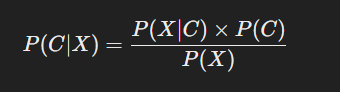

Where
𝑃
(
𝐶
∣
𝑋
)
P(C∣X) is the posterior probability of class
𝐶
C given feature set
𝑋
X,
𝑃
(
𝑋
∣
𝐶
)
P(X∣C) is the likelihood,
𝑃
(
𝐶
)
P(C) is the prior probability of class
𝐶
C, and
𝑃
(
𝑋
)
P(X) is the probability of feature set
𝑋
X. Naive Bayes calculates the likelihood of each feature given the class and then multiplies these probabilities together, assuming independence. This approach works well in applications like spam detection, sentiment analysis, and document categorization, where features can often be treated independently.

There are different variations of the Naive Bayes classifier based on the type of data: Gaussian Naive Bayes for continuous data, Multinomial Naive Bayes for count data, often used in text classification, and Bernoulli Naive Bayes for binary data. Each variation adapts to specific data distributions, making Naive Bayes versatile for many classification problems.

Despite its simplicity, Naive Bayes performs surprisingly well with high-dimensional datasets and is computationally efficient. However, it may struggle with complex relationships among features, where the independence assumption doesn’t hold. Nonetheless, Naive Bayes is an ideal baseline classifier and is often a first choice for text classification tasks due to its speed and reasonable accuracy.

In [1]:
import pandas as pd
data = pd.read_csv("/content/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
data.dtypes

,0
Sepal.Length,float64
Sepal.Width,float64
Petal.Length,float64
Petal.Width,float64
Species,object


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [4]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.preprocessing import scale
features=scale(data[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                     'Petal.Width']])

pd.DataFrame(features)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [6]:
target = data['Species']
target.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X = features
y = target

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# manual Code

In [11]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_classification(
        n_samples=1000, n_features=10, n_classes=2, random_state=123
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965


# By using library

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [14]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.965
